# mkgarf hrc-i letg

Only like 1 obsid in the archive!

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -f hrcf01801*.fits pcad*fits 
download_chandra_obsid 1801 evt2,pha2,asol,bpix,dtf

mv -f 1801/{primary,secondary}/*.fits.gz ./
gunzip -f *.fits.gz
/bin/rm -rf 1801
ls


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       24 Mb  ####################          < 1 s  49557.7 kb/s
  asol     fits        3 Mb  ####################          < 1 s  31757.1 kb/s
  pha2     fits      362 Kb  ####################          < 1 s  15627.8 kb/s
  dtf      fits      150 Kb  ####################          < 1 s  7769.6 kb/s
  dtf      fits        3 Kb  ####################          < 1 s  310.2 kb/s
  bpix     fits        3 Kb  ####################          < 1 s  280.0 kb/s

      Total download size for ObsId 1801 = 28 Mb
      Total download time for ObsId 1801 = < 1 s

1801_-1_LEG_garf.fits         hrcf01801_000N008_dtf1.fits
1801_1_LEG_garf.fits          hrcf01801_000N008_std_dtfstat1.fits
asphist.fits                  mkgarf_letghrci.ipynb
chips1.png                    mkgarf_letghrci.sh
hrcf01801N008_evt2.fits       p1.py
hrcf01801N008

## Inspect

```bash
prism hrcf01801N008_pha2.fits &
sleep 5
import -window prism prism.png
xpaset -p prism quit

display < prism.png
```


## asphist

In [3]:
pset asphist infile= pcadf01801_000N001_asol1.fits
pset asphist outfile=asphist.fits
pset asphist evtfile=hrcf01801N008_evt2.fits
pset asphist dtffile=hrcf01801_000N008_dtf1.fits
asphist mode=h clob+


# asphist (CIAO 4.14): WARNING: skipping 8 livetime correction records (from time: 82336842.920992 to time: 82337011.020998)




In [4]:
dmlist "hrcf01801N008_pha2.fits[SPECTRUM][cols x,y]" opt=data


 
--------------------------------------------------------------------------------
Data for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ROW    X                    Y
 
     1     16498.2792968750       16390.49218750
     2     16498.2792968750       16390.49218750


In [5]:
x=`dmkeypar hrcf01801N008_pha2.fits x echo+`
y=`dmkeypar hrcf01801N008_pha2.fits y echo+`
echo $x $y

16498.279296875 16390.4921875


## Run mkgarf


### LEG order =-1

In [6]:
pset mkgarf outfile=1801_-1_LEG_garf.fits
pset mkgarf order=-1
pset mkgarf asphistfile="asphist.fits[ASPHIST]"
pset mkgarf obsfile="hrcf01801N008_evt2.fits[EVENTS]"
pset mkgarf engrid=compute # "grid(rmf.fits[cols ENERG_LO,ENERG_HI])"
pset mkgarf detsubsys=HRC-I grating_arm=LEG 
pset mkgarf sourcepixelx=${x} sourcepixely=${y}
mkgarf mode=h clob+


In [7]:
pset mkgarf order=1
pset mkgarf outfile=1801_1_LEG_garf.fits
mkgarf mode=h clob+


## Plot

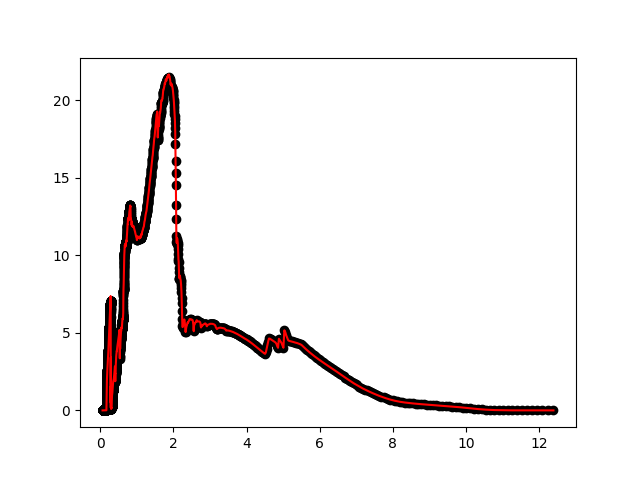

In [8]:
###cat << EOM > c1.py
###add_curve("1801_-1_LEG_garf.fits[cols ENERG_HI,SPECRESP]", "symbol.style=point line.style=none")
###add_curve("1801_1_LEG_garf.fits[cols ENERG_HI,SPECRESP]", "symbol.style=none line.style=solid line.color=red")
###print_window("chips1.png","export.clobber=True")
###quit()
###EOM

###chips -b c1.py

cat << EOM > p1.py
from pycrates import read_file
import matplotlib.pylab as plt

tab=read_file("1801_-1_LEG_garf.fits")
x = tab.get_column("ENERG_HI").values
y = tab.get_column("SPECRESP").values
plt.plot(x,y,marker="o",linestyle="None", mfc="black",mec="black")

tab=read_file("1801_1_LEG_garf.fits")
x = tab.get_column("ENERG_HI").values
y = tab.get_column("SPECRESP").values
plt.plot(x,y,marker="None",linestyle="solid",color="red")

plt.savefig("chips1.png")
EOM

python p1.py
display < chips1.png


# Cleanup


In [9]:
/bin/rm -f hrcf01801N008* hrcf01801_000N008* pcadf01801_000N001_asol1.fits
